## Project Name - Thyroid-Detection
## Problem Statement 
To build a classification methodology to predict the type of Thyroid based on the given training data.

## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

### Author - Mohd Shan
1. Linkdin - https://www.linkedin.com/in/mohd-shan/
2. Github -   https://github.com/Mohdshan12



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hypothyroid.csv")

## Step 1 - Data Analysis

In [3]:
data.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,negative


In [4]:
data.shape

(3772, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3772 non-null object
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3772 non-null 

In [6]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


## 1. Missing Values

In [7]:
data.replace(to_replace=["?"], value=np.nan, inplace=True)

In [8]:
data.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

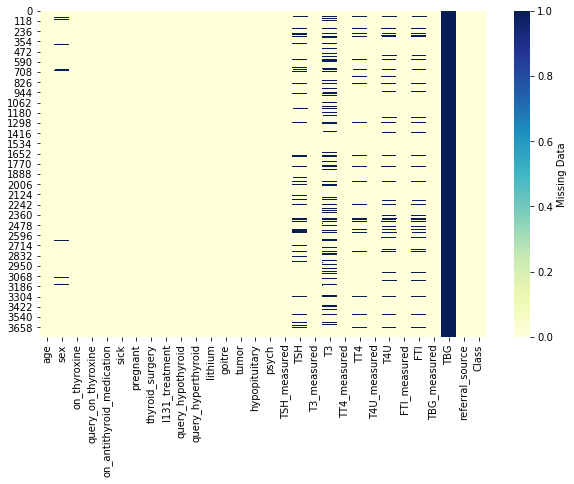

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

## Numerical Variables

In [10]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [11]:
num_feature = ['age','TSH','T3', 'TT4','T4U','FTI']
for x in num_feature:
    data[x] = data[x].astype('float64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3771 non-null float64
sex                          3622 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3403 non-null

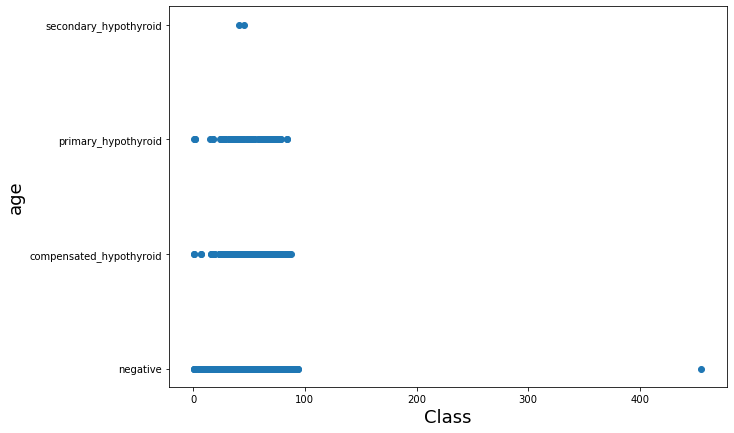

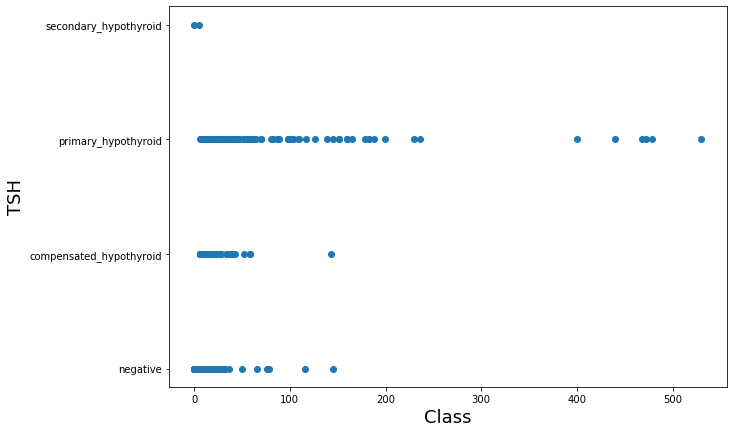

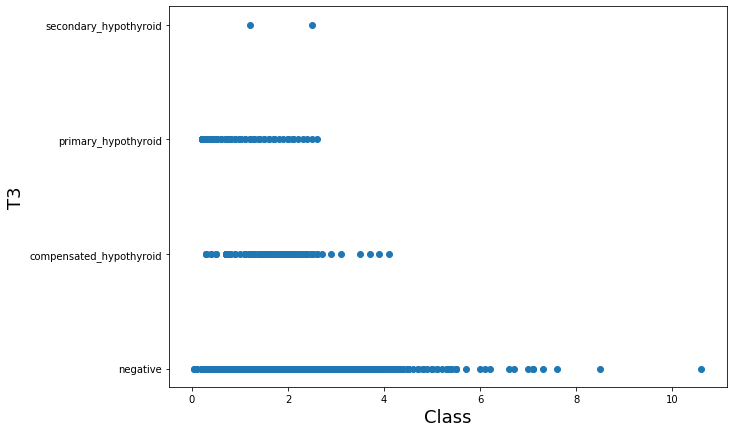

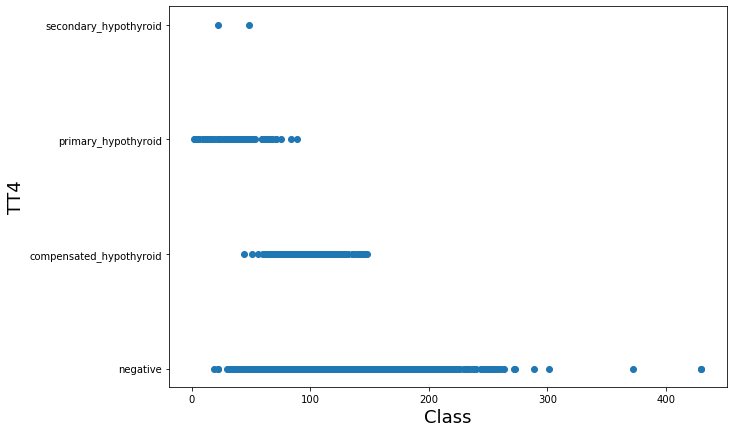

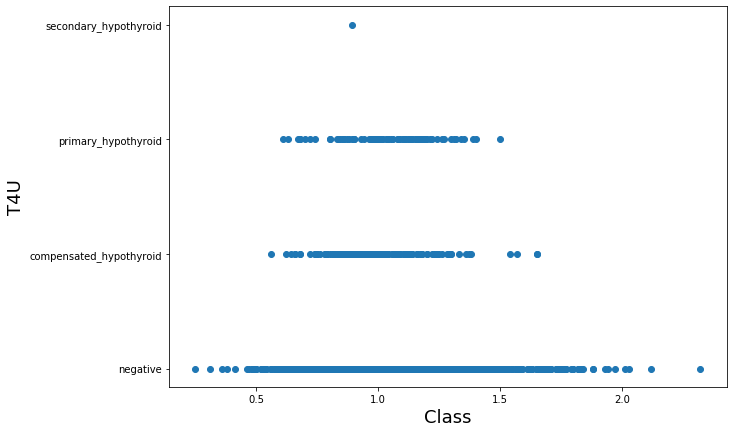

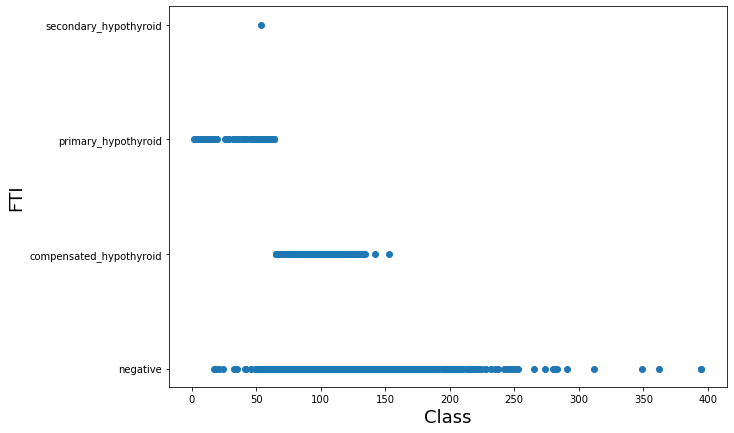

In [13]:
for feature in num_feature:
    plt.figure(figsize=(10,7))
    plt.scatter(x = feature , y ='Class', data = data )
    plt.xlabel("Class",fontsize=18)
    plt.ylabel(feature,fontsize=18)
    plt.show()
    print()

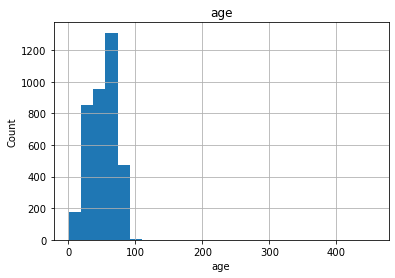

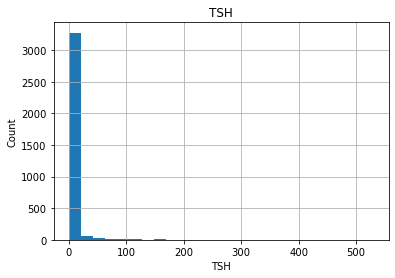

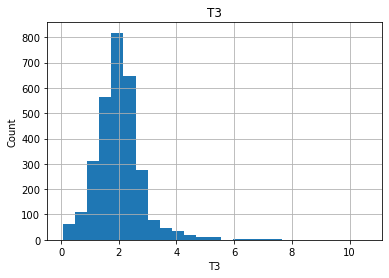

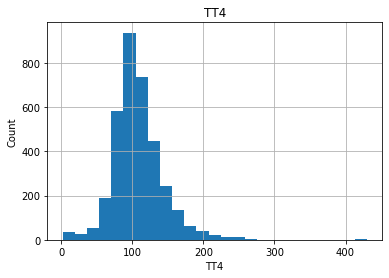

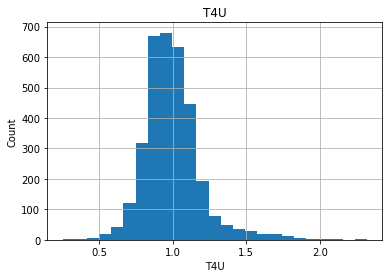

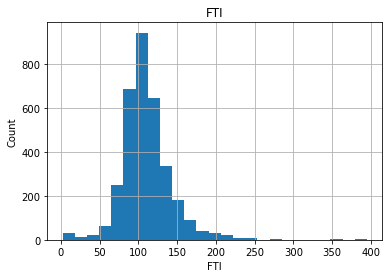

In [14]:
for feature in num_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Outliers

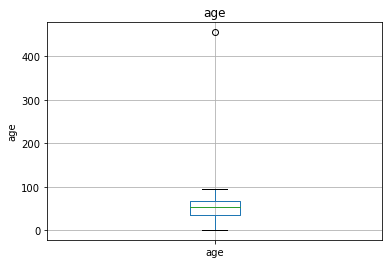

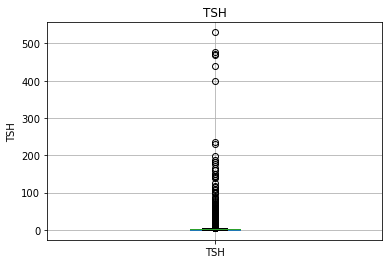

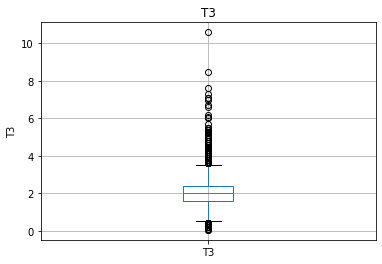

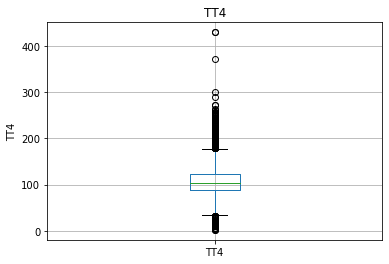

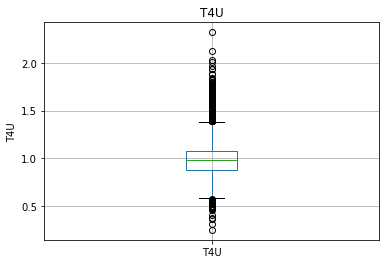

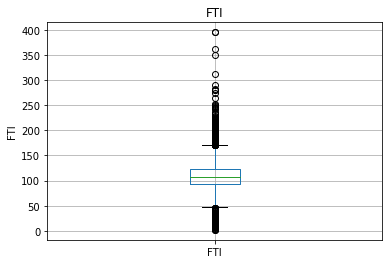

In [15]:
for feature in num_feature:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


In [16]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


## Categorical Variables

In [17]:
categorical_var = [feature for feature in data.columns if data[feature].dtypes=="O"]
print(categorical_var)

['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'Class']


In [18]:
data[categorical_var].head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,Class
0,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,M,f,f,f,f,f,f,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,F,t,f,f,f,f,f,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [19]:
for feature in categorical_var:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is sex and number of categories are 3
The feature is on_thyroxine and number of categories are 2
The feature is query_on_thyroxine and number of categories are 2
The feature is on_antithyroid_medication and number of categories are 2
The feature is sick and number of categories are 2
The feature is pregnant and number of categories are 2
The feature is thyroid_surgery and number of categories are 2
The feature is I131_treatment and number of categories are 2
The feature is query_hypothyroid and number of categories are 2
The feature is query_hyperthyroid and number of categories are 2
The feature is lithium and number of categories are 2
The feature is goitre and number of categories are 2
The feature is tumor and number of categories are 2
The feature is hypopituitary and number of categories are 2
The feature is psych and number of categories are 2
The feature is TSH_measured and number of categories are 2
The feature is T3_measured and number of categories are 2
The feat

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


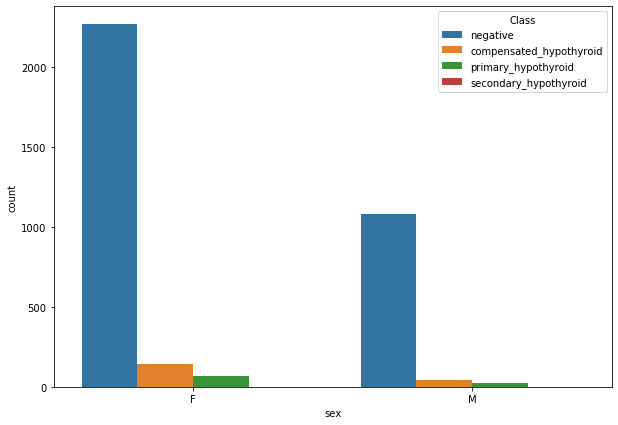

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


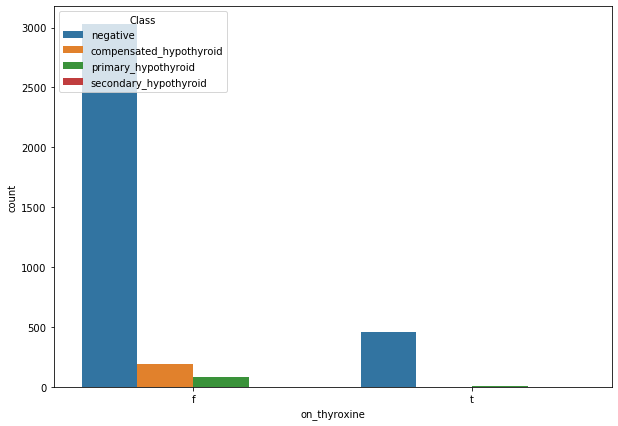

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


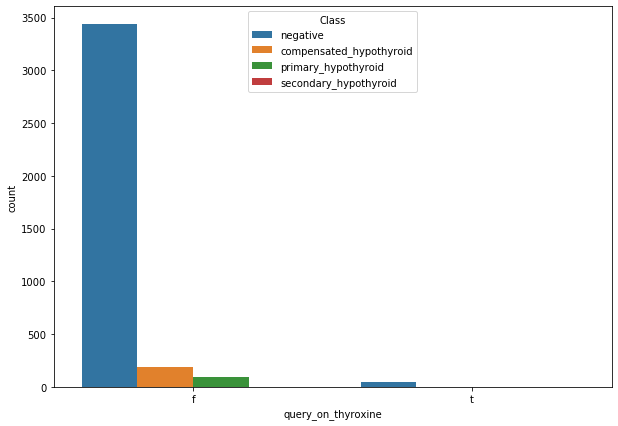

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


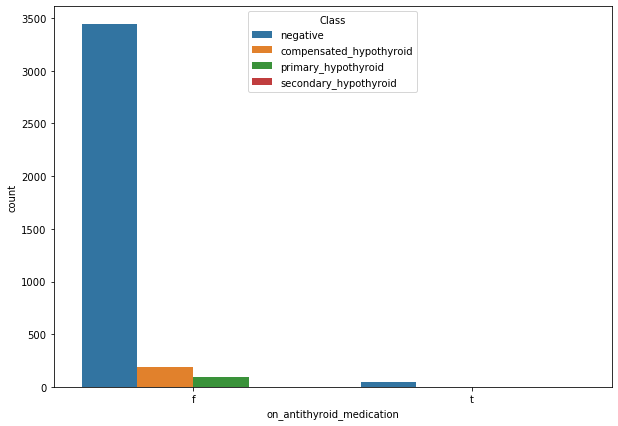

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


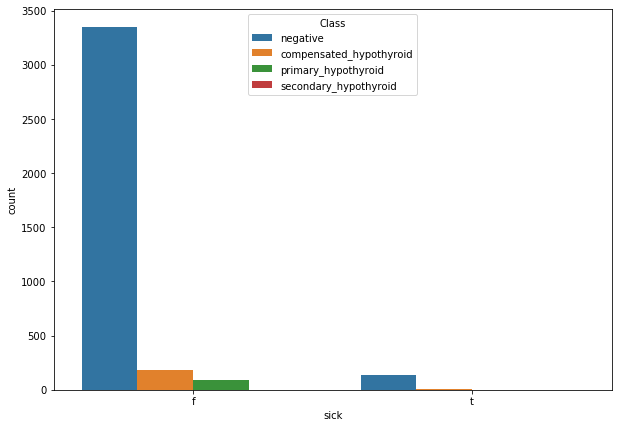

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


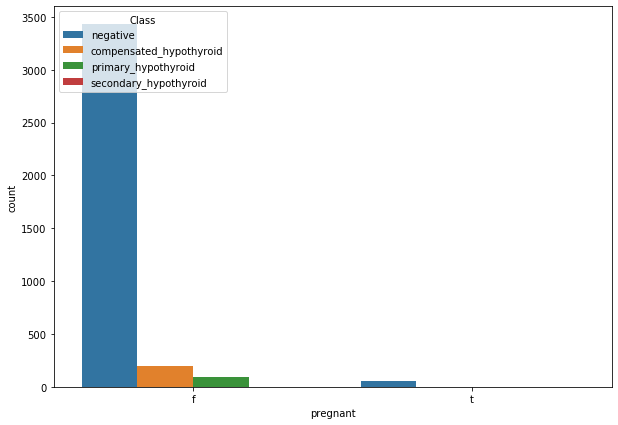

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


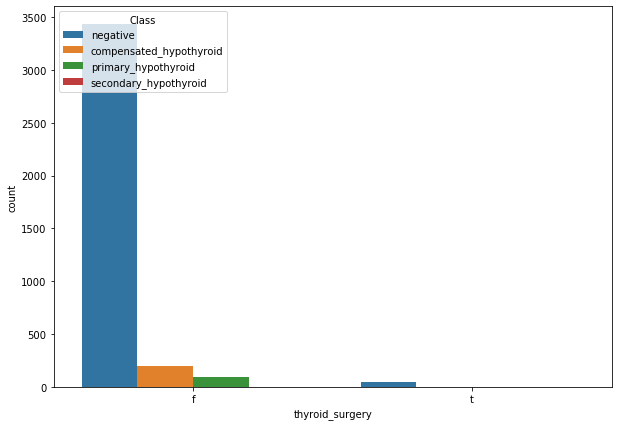

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


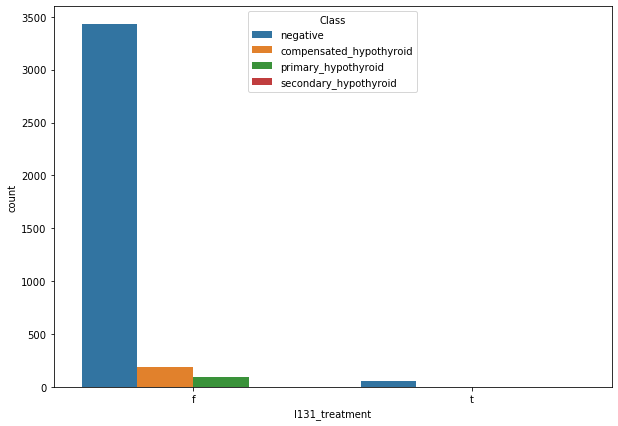

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


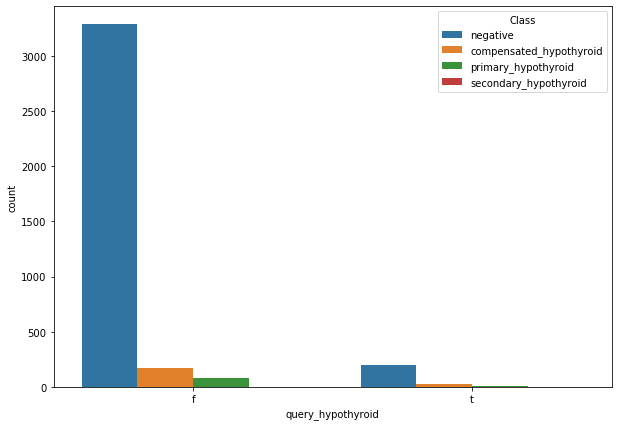

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


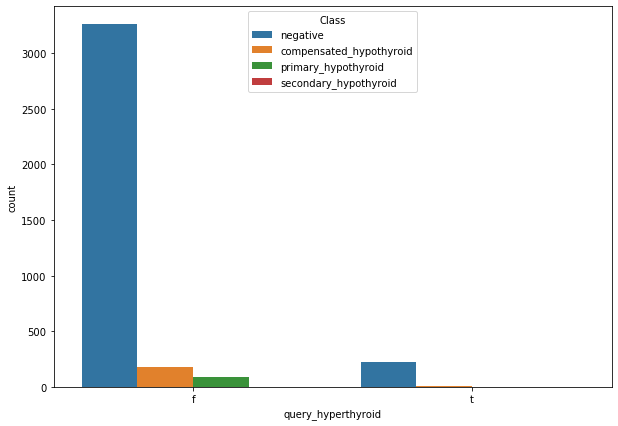

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


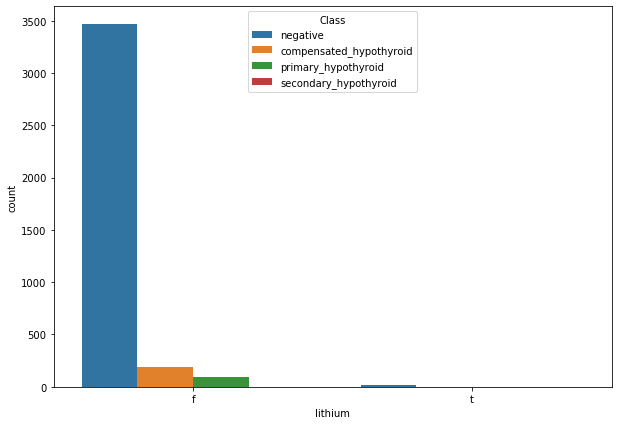

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


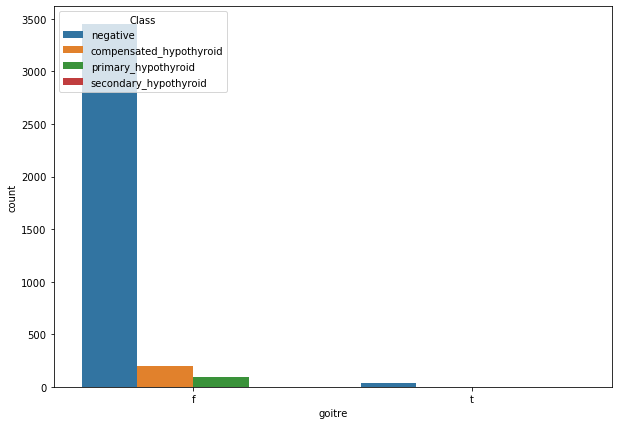

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


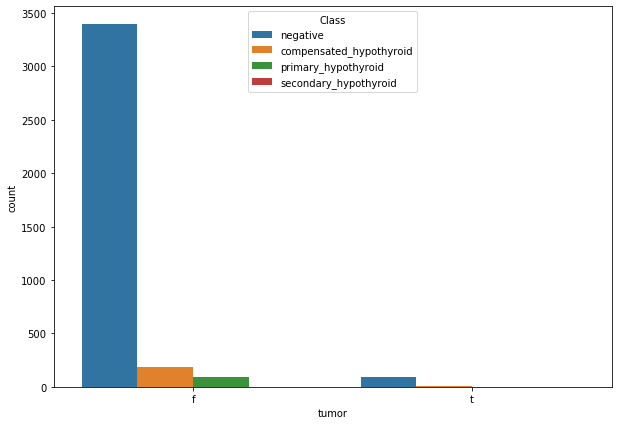

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


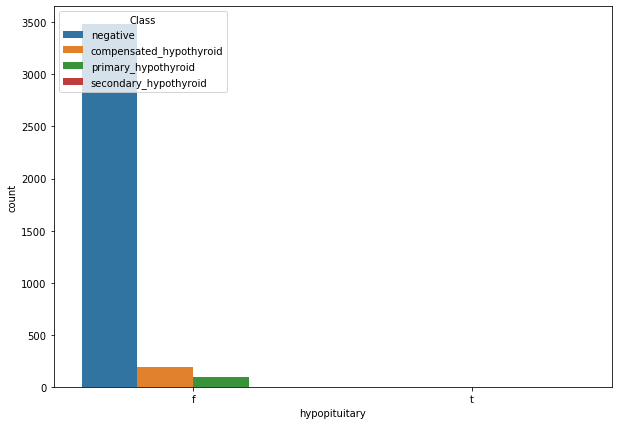

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


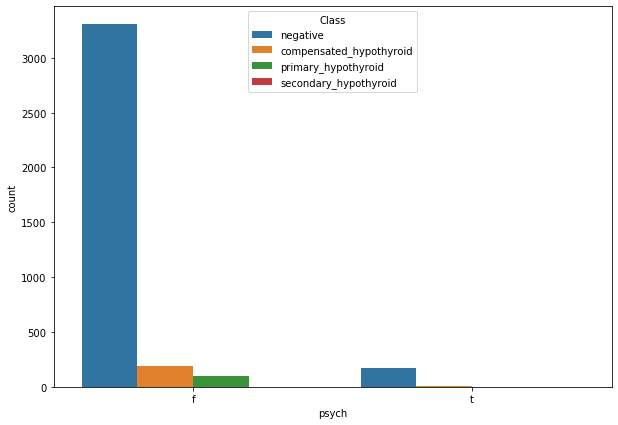

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


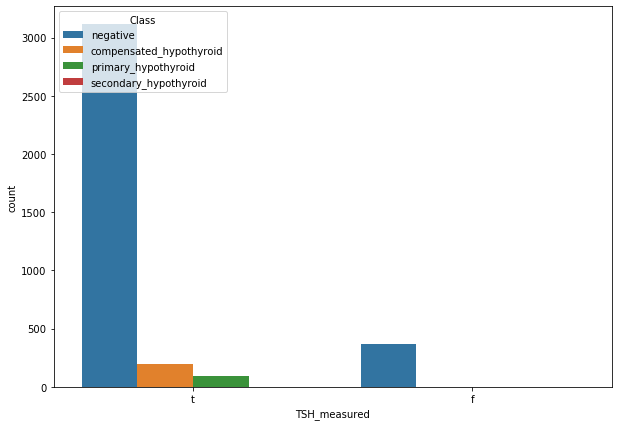

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


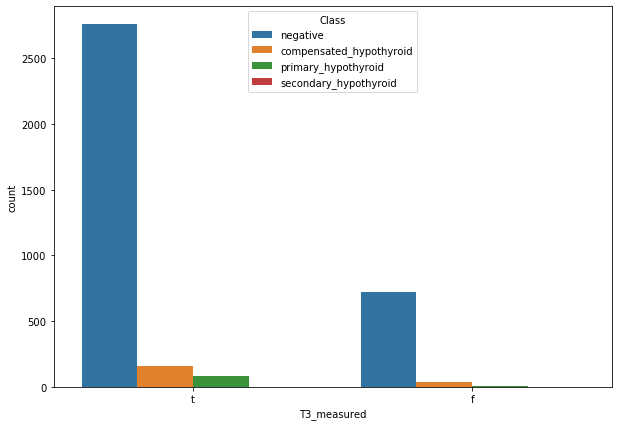

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


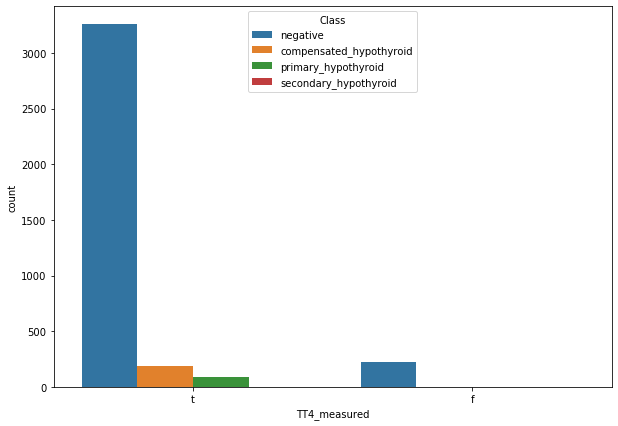

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


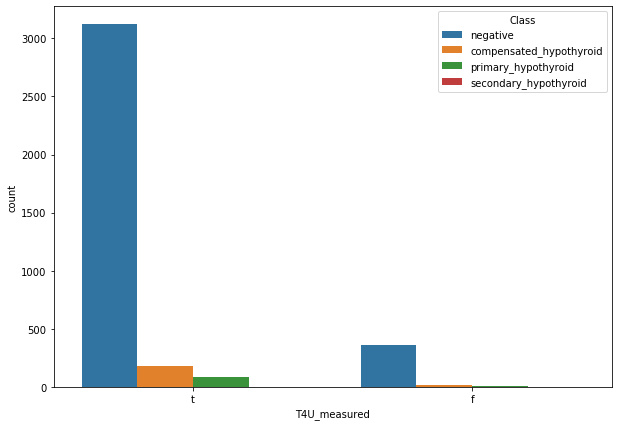

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


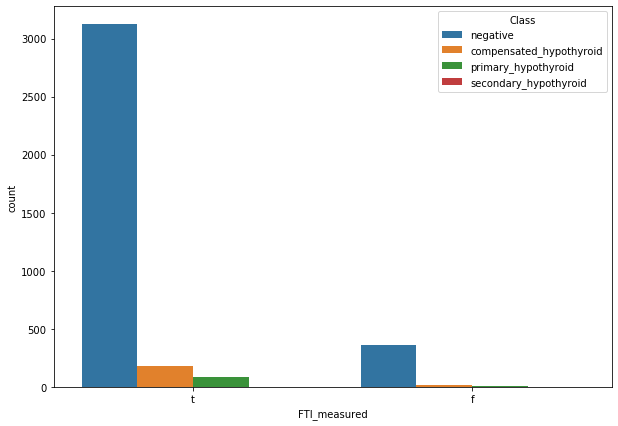

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


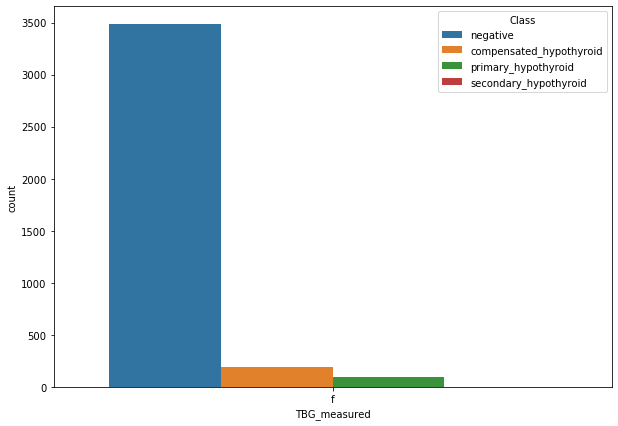

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


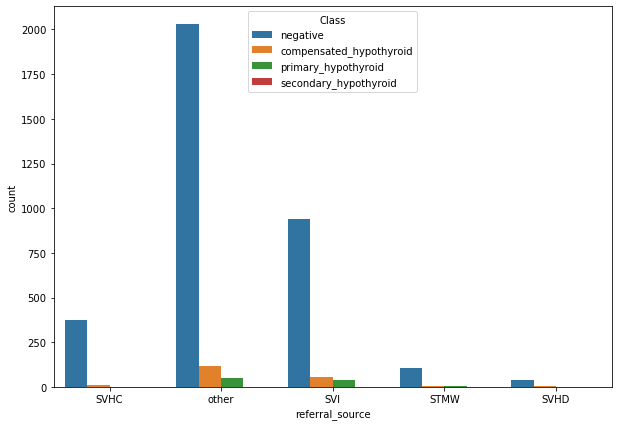

C:\Applications\envs\thyroid_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


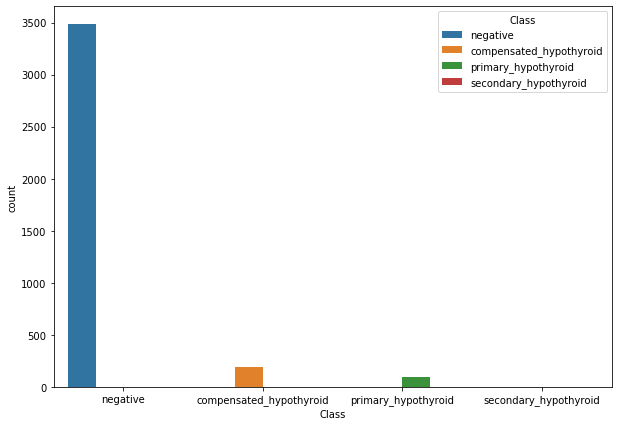

In [20]:
## Find out the relationship between categorical variable and dependent feature Class
for feature in categorical_var:
    plt.figure(figsize=(10,7))
    sns.countplot(feature,data = data,hue = 'Class')
    plt.show()

In [21]:
data['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

## Feature Engineering

In [22]:
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [23]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [24]:
data.drop(["TSH_measured","T3_measured","TT4_measured","T4U_measured","TBG_measured","FTI_measured","TBG"],
          axis =1,inplace =True)

In [25]:
data.head(50)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.300,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.100,2.0,102.0,NaN,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.980,NaN,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.160,1.9,175.0,NaN,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.720,1.2,61.0,0.87,70.0,SVI,negative
5,18.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.030,NaN,183.0,1.30,141.0,other,negative
6,59.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,72.0,0.92,78.0,other,negative
7,80.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,2.200,0.6,80.0,0.70,115.0,SVI,negative
8,66.0,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,0.600,2.2,123.0,0.93,132.0,SVI,negative
9,68.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,2.400,1.6,83.0,0.89,93.0,SVI,negative


## Missing Value Treatment

In [26]:
data.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [27]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [28]:
data["sex"].value_counts
sex_value = data['sex'].mode()[0]
sex_value

'F'

In [29]:
data["sex"].fillna(sex_value,inplace = True)
data['age'].fillna(data['age'].median(),inplace = True)
data['TT4'].fillna(data['TT4'].median(),inplace = True)
data['FTI'].fillna(data['FTI'].median(),inplace = True)
data['TSH'].fillna(data['TSH'].median(),inplace = True)
data['T3'].fillna(data['T3'].mean(),inplace = True)
data['T4U'].fillna(data['T4U'].mean(),inplace = True)

In [30]:
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source              0
Class                        0
dtype: int64

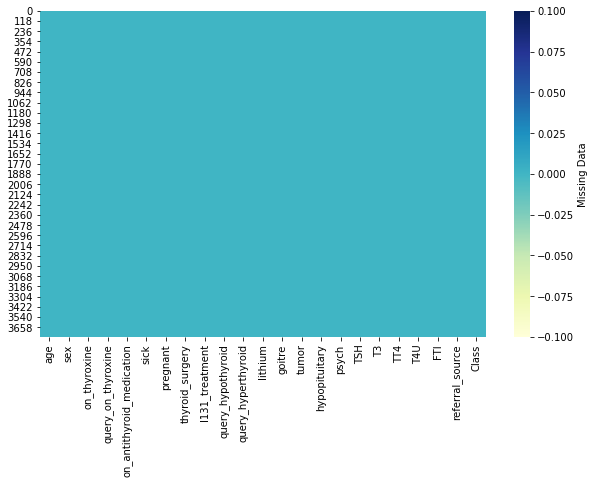

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

## Outlier_treatment

In [32]:
num_feature = [feature for feature in data.columns if data[feature].dtypes!="O"]
num_feature 

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

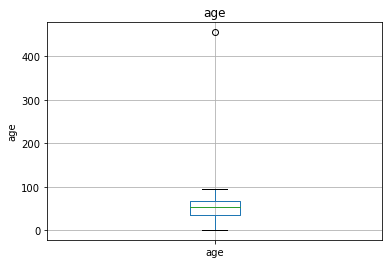

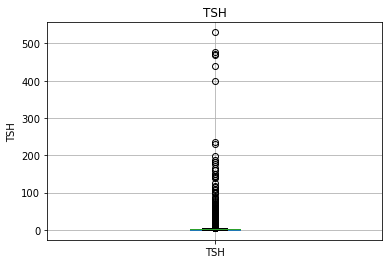

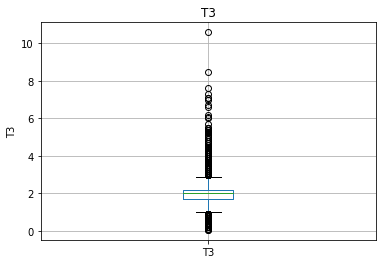

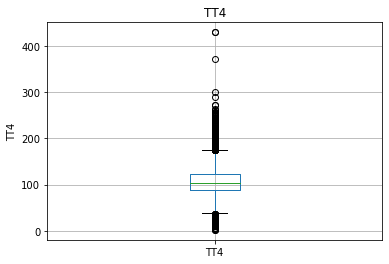

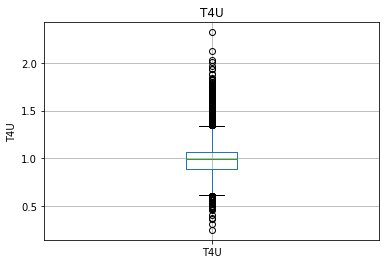

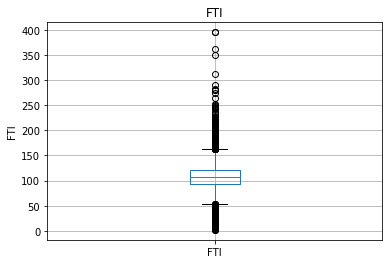

In [33]:
for feature in num_feature:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    

In [34]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data.age.quantile(0.75)-data.age.quantile(0.25)

In [35]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary=data['age'].mean() + 3* data['age'].std()
lower_boundary=data['age'].mean() - 3* data['age'].std()
print(lower_boundary), print(uppper_boundary),print(data['age'].mean())
data.loc[data['age']>=100,'age']=100

-8.510507559944209
111.9834662025741
51.73647932131495


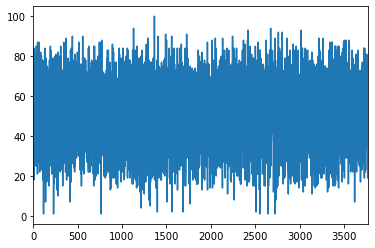

In [36]:
data['age'].plot()

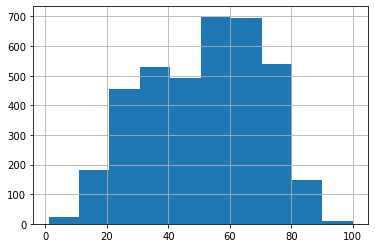

In [37]:
data['age'].hist()

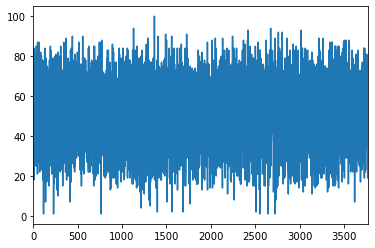

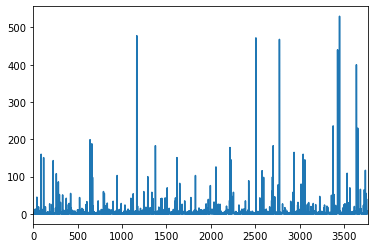

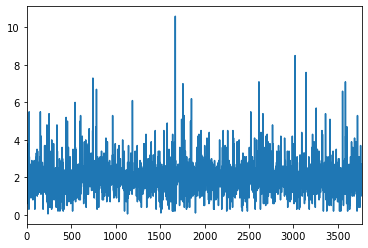

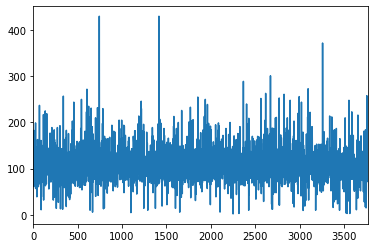

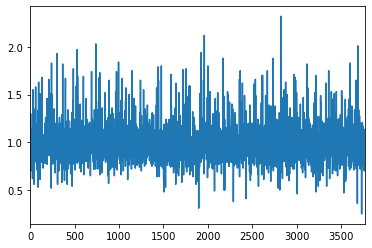

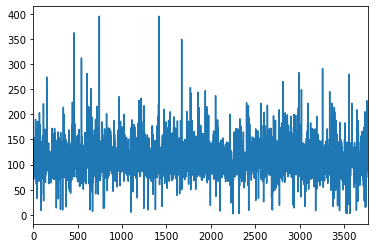

In [38]:
#before replacing outlier
for i in num_feature:
    data[i].plot()
    plt.show()

In [39]:
for feature in ['TSH', 'T3', 'TT4', 'T4U', 'FTI']:
    IQR=data[feature].quantile(0.75)-data[feature].quantile(0.25)
    uppper_boundary=data[feature].mean() + 3* data[feature].std()
    lower_boundary=data[feature].mean() - 3* data[feature].std()
    data.loc[data[feature]>=uppper_boundary,feature]=data[feature].mean()
    
    
    

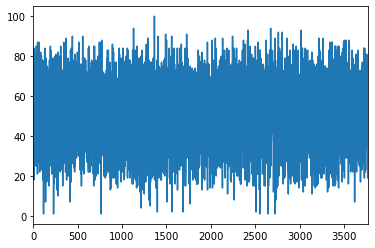

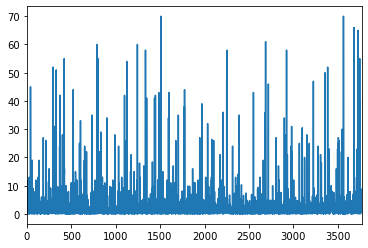

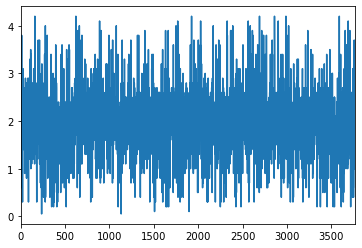

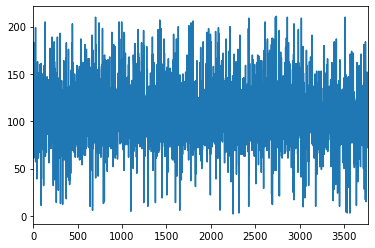

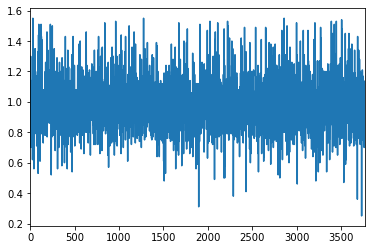

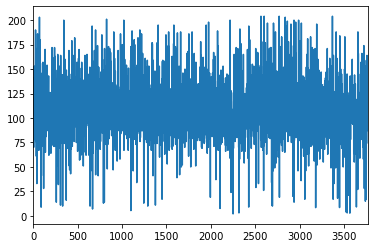

In [40]:
#after replacing outlier
for i in num_feature:
    data[i].plot()
    plt.show()

In [41]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.642365,2.862986,1.965602,106.198434,0.981621,108.289954
std,18.994330,6.188604,0.601079,30.115633,0.154804,26.648676
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000
50%,54.000000,1.400000,2.013500,103.000000,0.995000,107.000000
75%,67.000000,2.425000,2.200000,121.000000,1.060000,120.000000
max,100.000000,70.000000,4.200000,211.000000,1.550000,204.000000


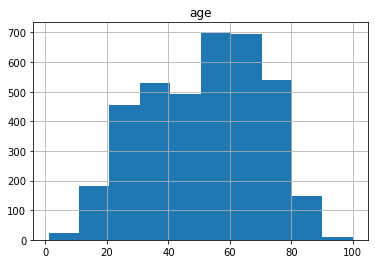

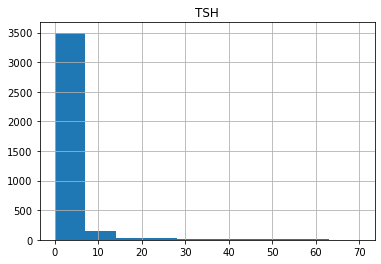

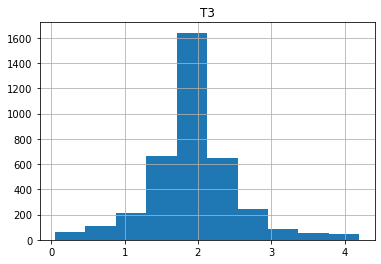

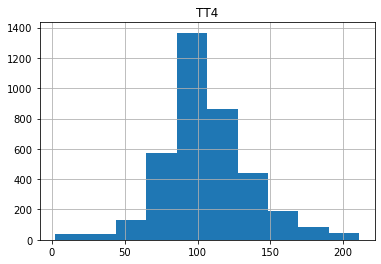

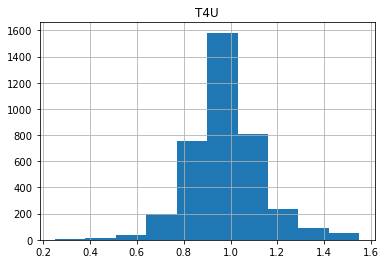

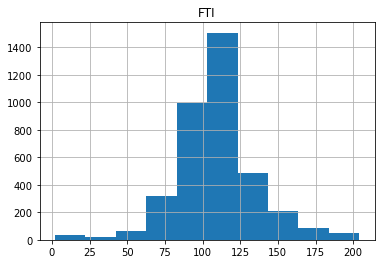

In [42]:
#after replacing outlier
for i in num_feature:
    data[i].hist()
    plt.title(i)
    plt.show()

## Encoding the categorical data

In [43]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5000,125.0,1.140,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.10,2.0000,102.0,0.995,107.0,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.98,2.0135,109.0,0.910,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.16,1.9000,175.0,0.995,107.0,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2000,61.0,0.870,70.0,SVI,negative


In [44]:
data['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

In [45]:
d = {'negative':0,'compensated_hypothyroid':1,'primary_hypothyroid':2,'secondary_hypothyroid':3}
data['Class'] = data['Class'].map(d)

In [46]:
data['Class'].value_counts()

0    3481
1     194
2      95
3       2
Name: Class, dtype: int64

In [47]:
data= pd.get_dummies(data,drop_first = True )
data

,age,TSH,T3,TT4,T4U,FTI,Class,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,sick_t,pregnant_t,thyroid_surgery_t,I131_treatment_t,query_hypothyroid_t,query_hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,1.30,2.5000,125.0,1.140,109.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,23.0,4.10,2.0000,102.0,0.995,107.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,46.0,0.98,2.0135,109.0,0.910,120.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70.0,0.16,1.9000,175.0,0.995,107.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,70.0,0.72,1.2000,61.0,0.870,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.40,2.0135,103.0,0.995,107.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3768,68.0,1.00,2.1000,124.0,1.080,114.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3769,74.0,5.10,1.8000,112.0,1.070,105.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3770,72.0,0.70,2.0000,82.0,0.940,87.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
data.head()

,age,TSH,T3,TT4,T4U,FTI,Class,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,sick_t,pregnant_t,thyroid_surgery_t,I131_treatment_t,query_hypothyroid_t,query_hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,1.30,2.5000,125.0,1.140,109.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,23.0,4.10,2.0000,102.0,0.995,107.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,46.0,0.98,2.0135,109.0,0.910,120.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70.0,0.16,1.9000,175.0,0.995,107.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,70.0,0.72,1.2000,61.0,0.870,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [49]:
X = data.drop(["Class"],axis = 1)
y = data["Class"]

In [50]:
# colum = X.columns
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X=pd.DataFrame(scaler.fit_transform(X),columns = colum)
# import pickle
# pickle.dump(scaler, open('scaler.pkl','wb'))

In [51]:
X

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,sick_t,pregnant_t,thyroid_surgery_t,I131_treatment_t,query_hypothyroid_t,query_hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,1.30,2.5000,125.0,1.140,109.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,23.0,4.10,2.0000,102.0,0.995,107.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,46.0,0.98,2.0135,109.0,0.910,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70.0,0.16,1.9000,175.0,0.995,107.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,70.0,0.72,1.2000,61.0,0.870,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.40,2.0135,103.0,0.995,107.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3768,68.0,1.00,2.1000,124.0,1.080,114.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3769,74.0,5.10,1.8000,112.0,1.070,105.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3770,72.0,0.70,2.0000,82.0,0.940,87.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## feature Selection

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [53]:
print(model.feature_importances_)

[4.62380980e-02 4.95532566e-01 5.66858515e-02 1.06163885e-01
 4.92321993e-02 1.41064080e-01 1.09910197e-02 2.49406729e-02
 2.06893609e-03 1.85183203e-03 5.30149325e-03 6.42856396e-04
 1.12361979e-02 2.06384267e-03 1.05585474e-02 6.21918084e-03
 5.75471687e-04 6.77587660e-04 3.40108279e-03 9.08238104e-06
 3.29102173e-03 2.95254035e-03 1.19121727e-03 7.80373450e-03
 9.30700299e-03]


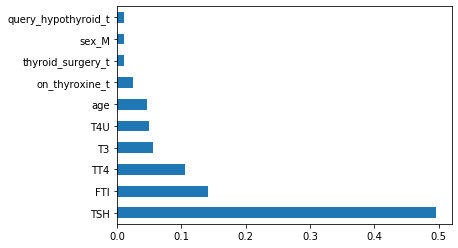

In [54]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [55]:
top_10_feature = ranked_features.nlargest(10).index.to_list()
print(top_10_feature)

['TSH', 'FTI', 'TT4', 'T3', 'T4U', 'age', 'on_thyroxine_t', 'thyroid_surgery_t', 'sex_M', 'query_hypothyroid_t']


In [56]:
X=X[top_10_feature]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 10,test_size = 0.3)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=RF_classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1036    3    4]
 [   0   59    1]
 [   0    0   29]]
0.9929328621908127
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1043
           1       0.95      0.98      0.97        60
           2       0.85      1.00      0.92        29

    accuracy                           0.99      1132
   macro avg       0.93      0.99      0.96      1132
weighted avg       0.99      0.99      0.99      1132



In [61]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(x_train,y_train)
y_pred=kn_classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1037    4    2]
 [  45   15    0]
 [   5    3   21]]
0.9478798586572438
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1043
           1       0.68      0.25      0.37        60
           2       0.91      0.72      0.81        29

    accuracy                           0.95      1132
   macro avg       0.85      0.66      0.72      1132
weighted avg       0.94      0.95      0.94      1132



In [62]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_over)))

Original dataset shape Counter({0: 3481, 1: 194, 2: 95, 3: 2})
Resampled dataset shape Counter({0: 3481, 1: 3481, 2: 3481, 3: 3481})


In [63]:
x_train_o,x_test_o,y_train_o,y_test_o = train_test_split(X_over,y_over ,random_state = 10,test_size = 0.3)

In [64]:
RF_classifier_o = RandomForestClassifier()
RF_classifier_o.fit(x_train_o,y_train_o)
y_pred_o=RF_classifier_o.predict(x_test_o)
print(confusion_matrix(y_test_o,y_pred_o))
print(accuracy_score(y_test_o,y_pred_o))
print(classification_report(y_test_o,y_pred_o))

[[1025    1    2    0]
 [   0 1035    0    0]
 [   0    0 1070    0]
 [   0    0    0 1045]]
0.9992819530876017
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1028
           1       1.00      1.00      1.00      1035
           2       1.00      1.00      1.00      1070
           3       1.00      1.00      1.00      1045

    accuracy                           1.00      4178
   macro avg       1.00      1.00      1.00      4178
weighted avg       1.00      1.00      1.00      4178



In [65]:
import pickle
pickle.dump(RF_classifier_o, open('model.pkl','wb'))